In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix, parallel_coordinates
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px


In [216]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=",\s*", engine='python', na_values="?")

<>:5: SyntaxWarning:

invalid escape sequence '\s'

<>:5: SyntaxWarning:

invalid escape sequence '\s'

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/2812567494.py:5: SyntaxWarning:

invalid escape sequence '\s'



In [217]:
data.drop(columns=['fnlwgt'], inplace=True)
data.replace(' ?', np.nan, inplace=True)
for column in data.columns:
    most_frequent = data[column].mode()[0]
    data[column].fillna(most_frequent, inplace=True)
    
categorical_columns = ["workclass", "education", "marital-status", "occupation", 
                       "relationship", "race", "sex", "native-country", "income"]
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/328728926.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/328728926.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  32561 non-null  category
 13  income          32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


In [219]:

categorical_cols = data.select_dtypes(include=['category', 'object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

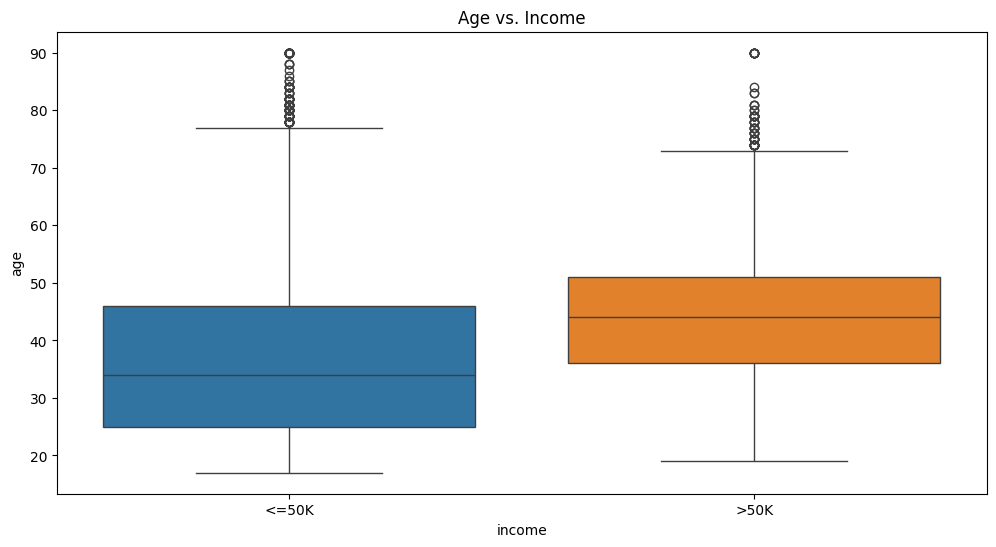

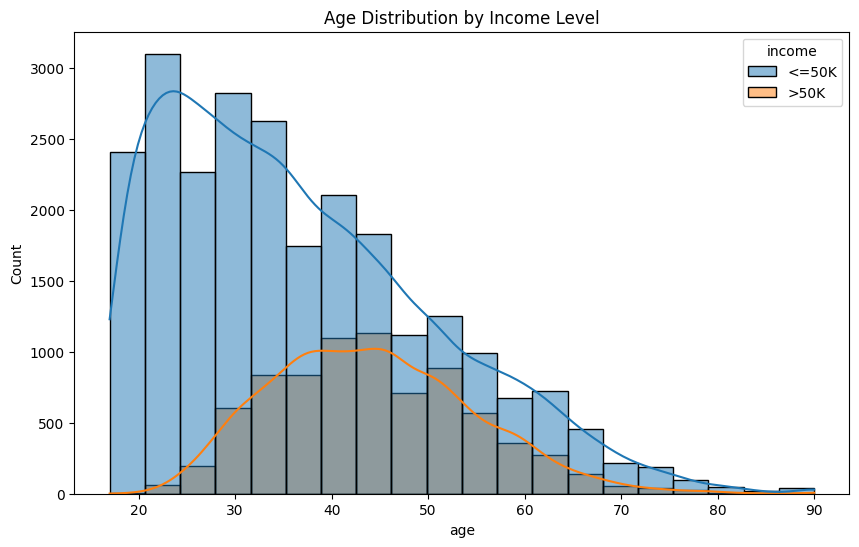

In [220]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age',hue='income', data=data)
plt.title('Age vs. Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='income', bins=20, kde=True)
plt.title('Age Distribution by Income Level')
plt.show()


/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/2132956854.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



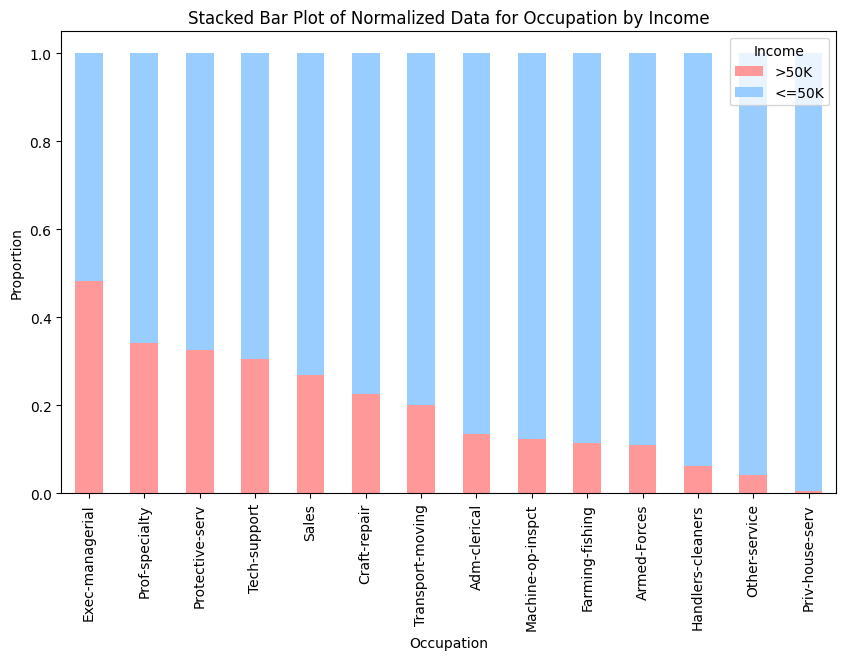

In [221]:
education_income = data.groupby(['occupation', 'income']).size().unstack().fillna(0)
education_income = education_income.div(education_income.sum(axis=1), axis=0)
education_income = education_income[['>50K', '<=50K']]
education_income['>50K_proportion'] = education_income['>50K']
sorted_countries = education_income.sort_values('>50K_proportion', ascending=False).index
education_income_sorted = education_income.loc[sorted_countries]
education_income_sorted[['>50K', '<=50K']].plot(kind='bar', stacked=True, figsize=(10, 6), color= ['#FF9999', '#99CCFF'])
plt.title('Stacked Bar Plot of Normalized Data for Occupation by Income')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()

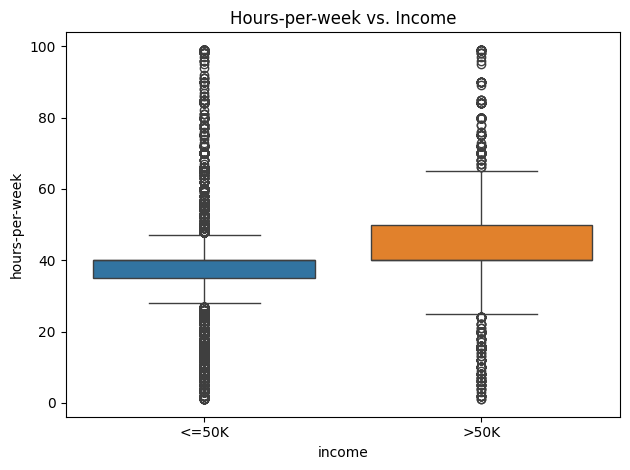

In [222]:
sns.boxplot(x='income', y='hours-per-week', hue='income', data=data)
plt.title('Hours-per-week vs. Income')
plt.tight_layout()
plt.show()

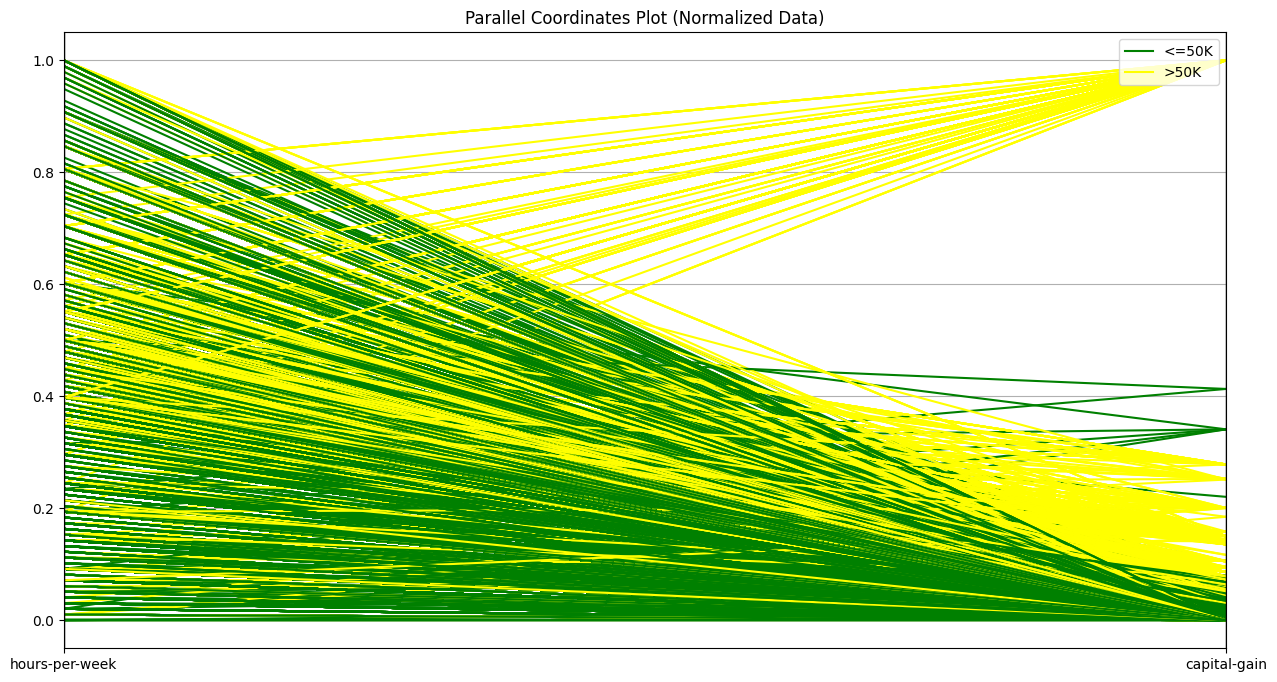

In [226]:

scaler = MinMaxScaler()

# Apply the scaler to the selected numerical columns
numerical_columns = ['age', 'education-num', 'capital-gain', 'hours-per-week']
normalized_data = data.copy()
normalized_data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Encode the 'income' for visualization purposes (to be used as a color or class label in plots)
parallel_data = normalized_data[['hours-per-week', 'capital-gain', 'income']]

# Create a parallel coordinates plot using the normalized data
plt.figure(figsize=(15, 8))
parallel_coordinates(parallel_data, 'income',color={'yellow', 'green'})
plt.title('Parallel Coordinates Plot (Normalized Data)')
plt.show()


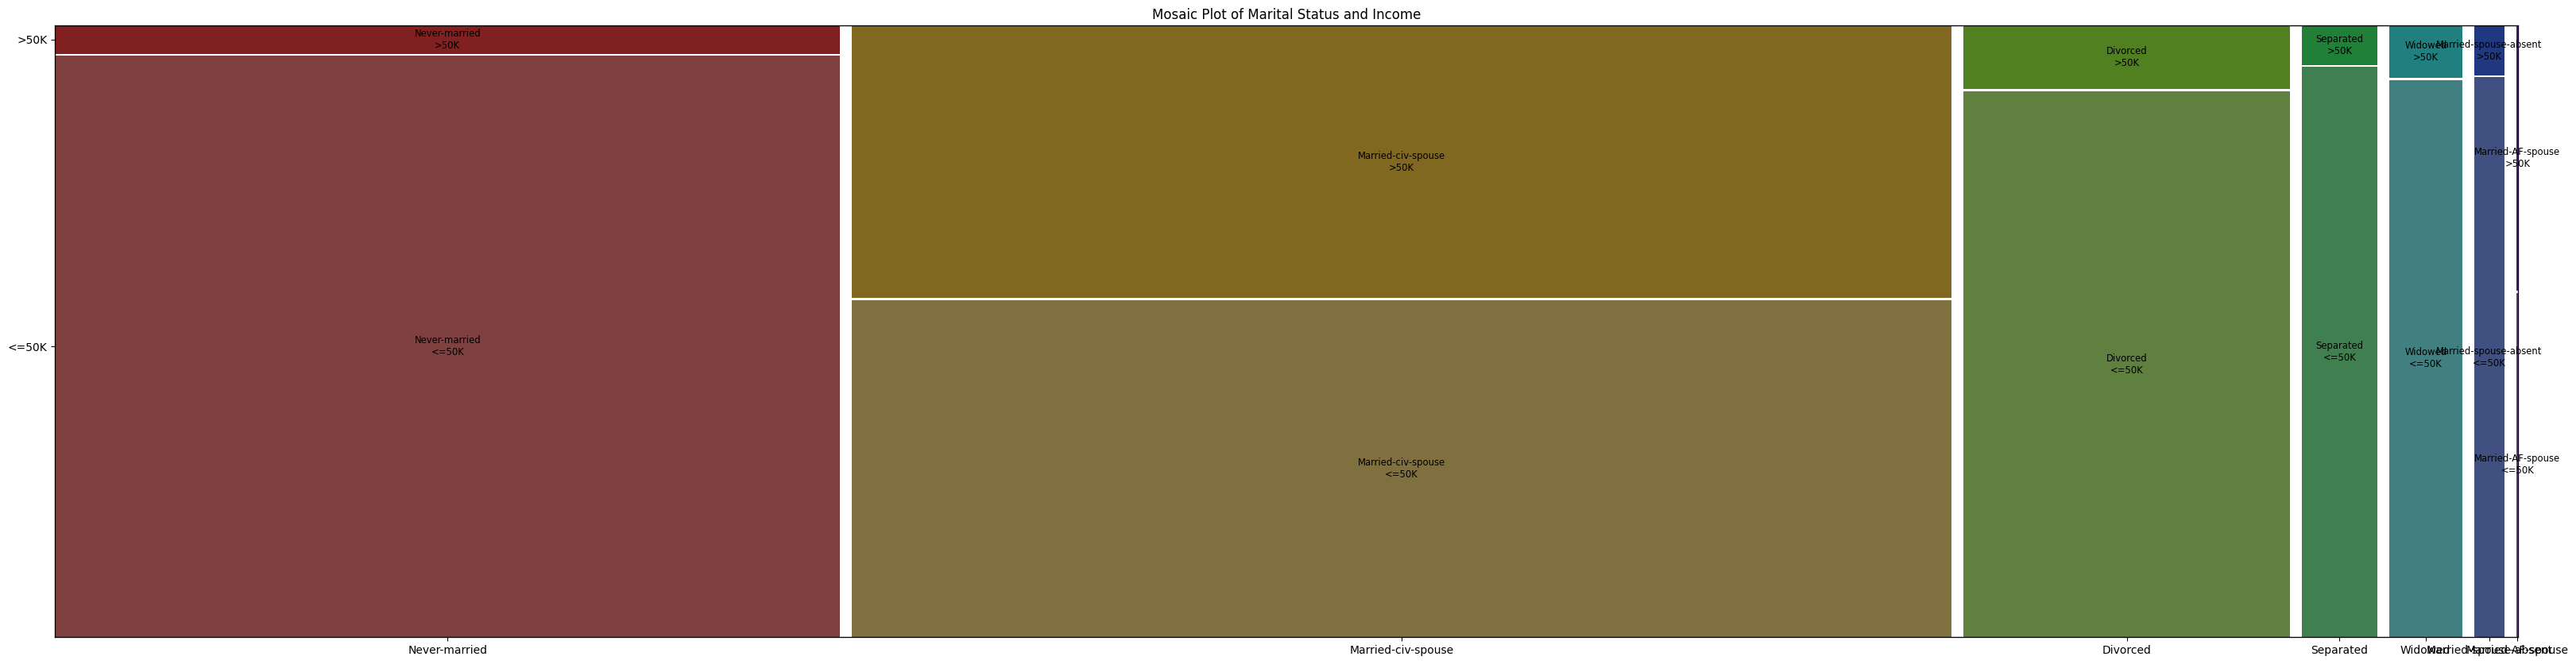

In [227]:
mosaic_data = data[['marital-status', 'income']]

# Convert to dictionary for mosaic plot
mosaic_dict = mosaic_data.apply(lambda x: tuple(x), axis=1).value_counts().to_dict()

# Plot the mosaic
fig, ax = plt.subplots(figsize=(40, 10))
mosaic(mosaic_dict, ax=ax, title='Mosaic Plot of Marital Status and Income')
plt.show()

In [228]:
px.parallel_categories(data,color=data['income'].apply(lambda x: 1 if x == '>50K' else 0), dimensions=['relationship','sex','income'],
                              color_continuous_midpoint=1)

13

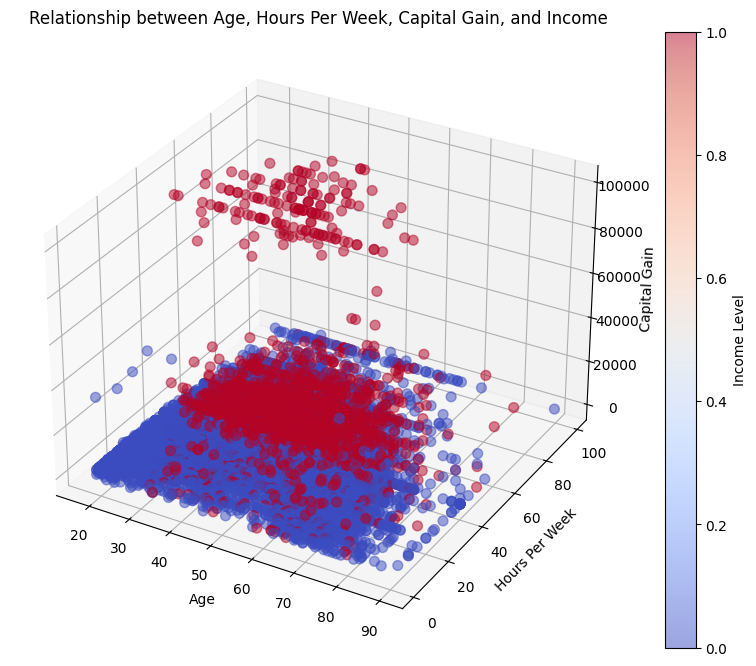

In [229]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot points with income level coloring
ax.scatter(data['age'], data['hours-per-week'],data['capital-gain'], c=data['income'].apply(lambda x: 1 if x == '>50K' else 0),cmap='coolwarm', s=50, alpha=0.5)
# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Hours Per Week')
ax.set_zlabel('Capital Gain')
ax.set_title('Relationship between Age, Hours Per Week, Capital Gain, and Income')
# Add color bar for income levels
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='coolwarm', alpha=0.5))
cbar.set_label('Income Level')
13

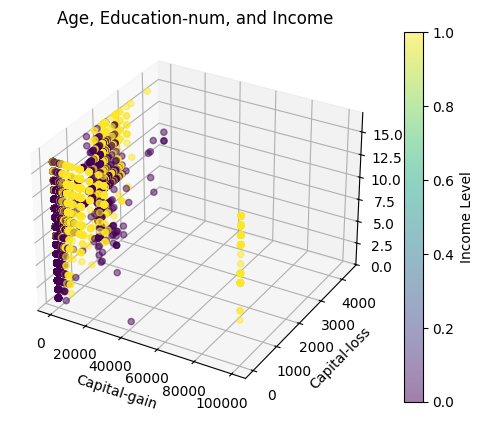

In [230]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['capital-gain'], data['capital-loss'], data['education-num'], c=data['income'].apply(lambda x: 1 if x == '>50K' else 0),cmap='viridis', alpha=0.5)
ax.set_xlabel('capital-gain'.capitalize())
ax.set_ylabel('capital-loss'.capitalize())
ax.set_zlabel('education-num'.capitalize())
8
plt.title(f'{'age'.capitalize()}, {'education-num'.capitalize()}, and {'income'.capitalize()}')
cbar = plt.colorbar(scatter)
cbar.set_label('Income Level')
plt.show()

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/4284405325.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



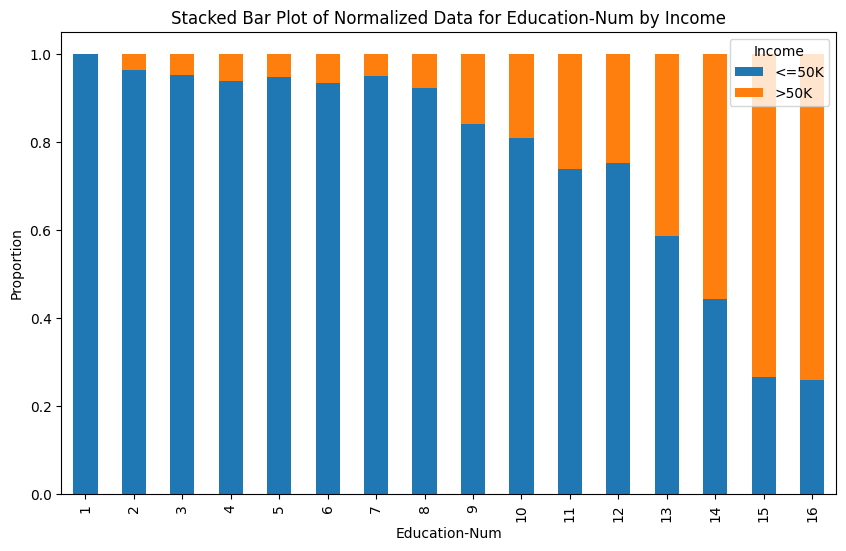

In [231]:
education_income = data.groupby(['education-num', 'income']).size().unstack().fillna(0)
education_income = education_income.div(education_income.sum(axis=1), axis=0)
education_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Normalized Data for Education-Num by Income')
plt.xlabel('Education-Num')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/1282070733.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



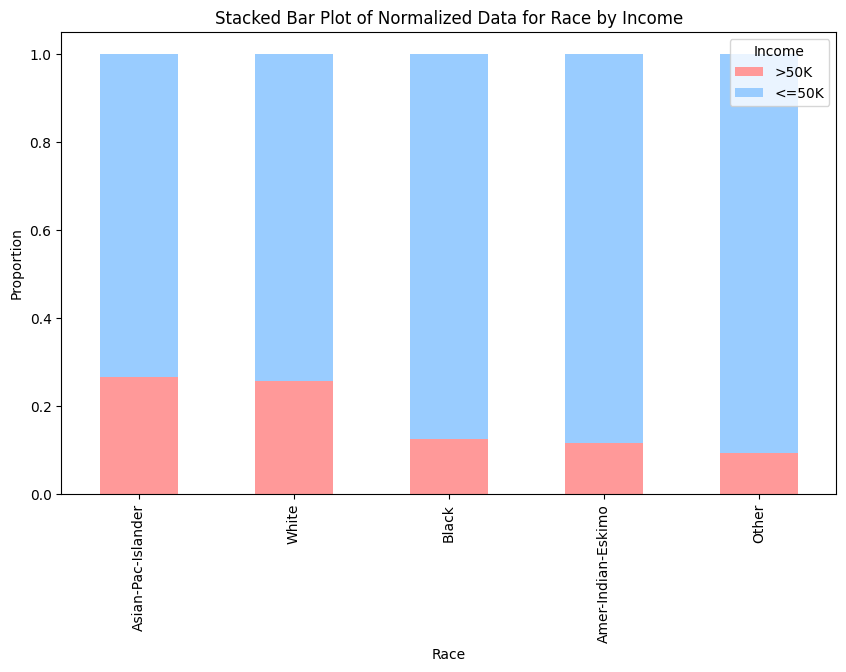

In [232]:
education_income = data.groupby(['race', 'income']).size().unstack().fillna(0)
education_income = education_income.div(education_income.sum(axis=1), axis=0)
education_income = education_income[['>50K', '<=50K']]
education_income['>50K_proportion'] = education_income['>50K']
sorted_countries = education_income.sort_values('>50K_proportion', ascending=False).index
education_income_sorted = education_income.loc[sorted_countries]
education_income_sorted[['>50K', '<=50K']].plot(kind='bar', stacked=True, figsize=(10, 6), color= ['#FF9999', '#99CCFF'])
plt.title('Stacked Bar Plot of Normalized Data for Race by Income')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()

In [233]:
px.parallel_categories(data,color=data['income'].apply(lambda x: 1 if x == '>50K' else 0), dimensions=['race','sex','income'],
                              color_continuous_midpoint=1)

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/2907259156.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_95360/2907259156.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



(16, 2)
['Doctorate', 'Prof-school', 'Masters', 'Bachelors', 'Assoc-voc', 'Assoc-acdm', 'Some-college', 'HS-grad', '12th', '10th', '7th-8th', '9th', '11th', '5th-6th', '1st-4th', 'Preschool']


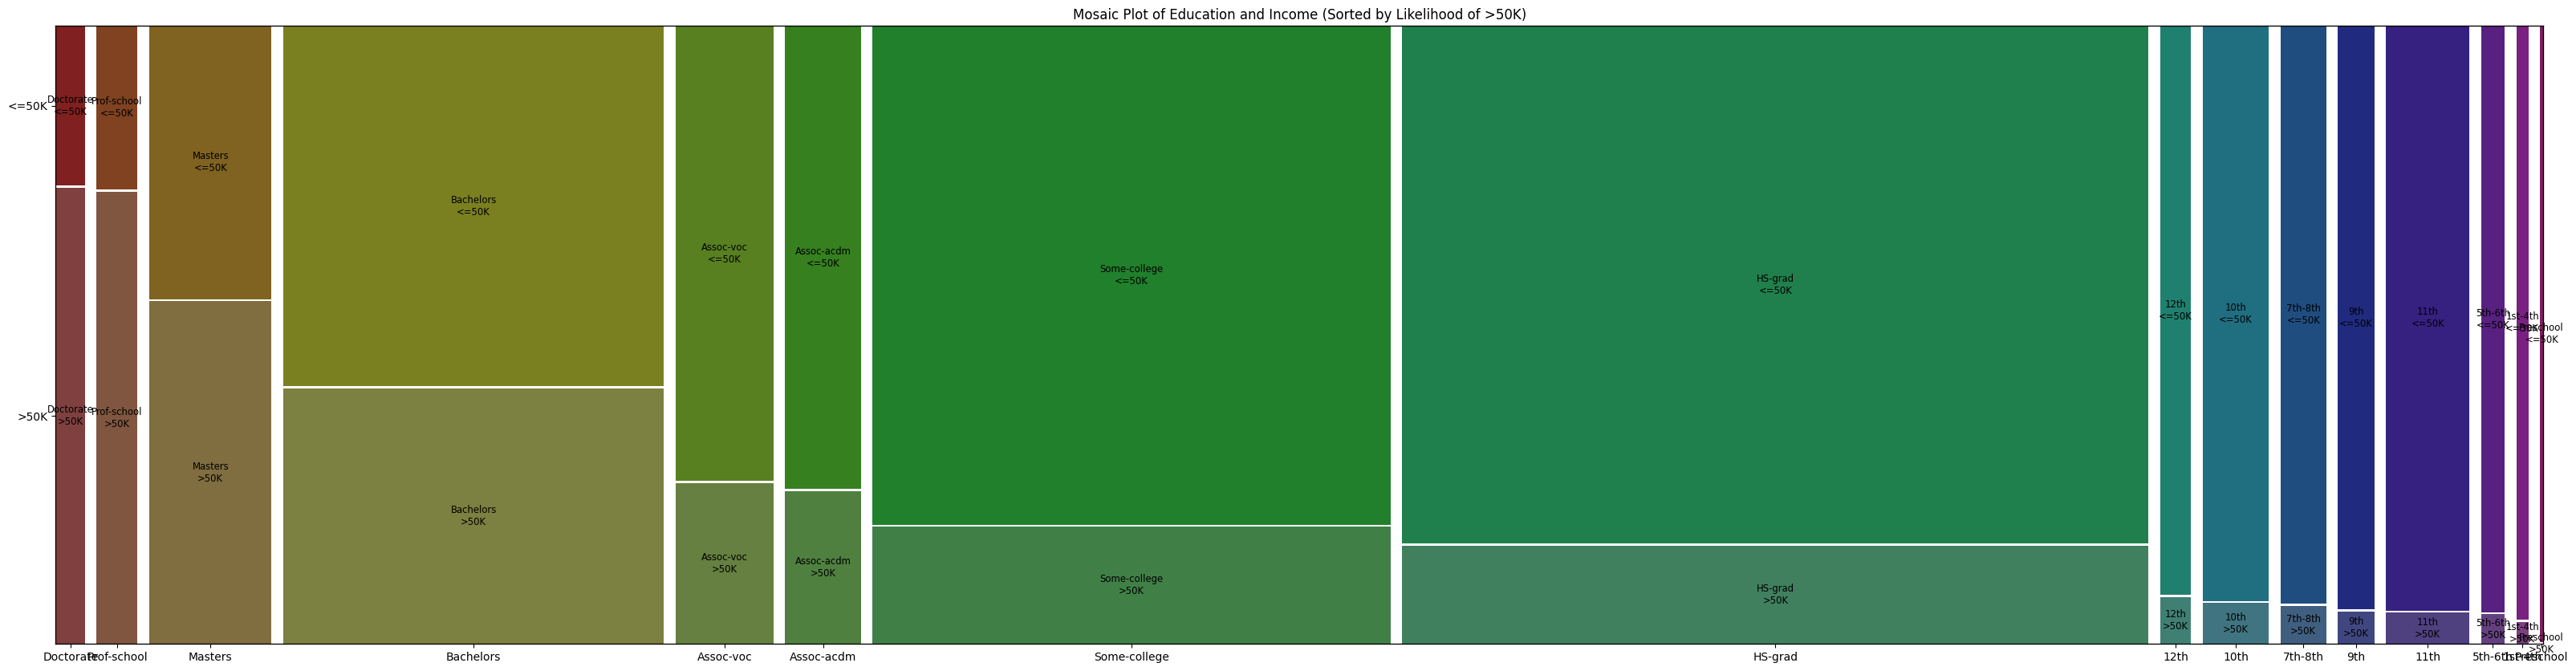

In [234]:
mosaic_data = data[['education', 'income']]
mosaic_data['income'] = mosaic_data['income'].apply(lambda x: '>50K' if x == '>50K' else '<=50K')

# Calculate the proportion of >50K income in each education level
edu_income_counts = mosaic_data.groupby(['education', 'income']).size().unstack(fill_value=0)
print(edu_income_counts.shape)


edu_income_counts['>50K_rate'] = edu_income_counts['>50K'] / edu_income_counts.sum(axis=1)
edu_income_counts_sorted = edu_income_counts.sort_values('>50K_rate', ascending=False)

# Create a sorted dictionary for the mosaic plot
sorted_education_order = edu_income_counts_sorted.index.tolist()
print(sorted_education_order)
mosaic_data_sorted = pd.DataFrame()

mosaic_dict = {}
for level in sorted_education_order:
    for income_level in ['>50K', '<=50K']:
        count = mosaic_data[(mosaic_data['education'] == level) & (mosaic_data['income'] == income_level)].shape[0]
        mosaic_dict[(level, income_level)] = count

# Plot the mosaic
fig, ax = plt.subplots(figsize=(40, 10))
vibgyor_colors = {
    'Violet': '#E6E6FA',    # Light Violet
    'Indigo': '#CCCCFF',    # Light Indigo
    'Blue': '#ADD8E6',      # Light Blue
    'Green': '#90EE90',     # Light Green
    'Yellow': '#FFFFE0',    # Light Yellow
    'Orange': '#FFDAB9',    # Light Orange
    'Red': '#FFCCCB'        # Light Red
}
mosaic(mosaic_dict, ax=ax, title='Mosaic Plot of Education and Income (Sorted by Likelihood of >50K)', properties=vibgyor_colors)
plt.show()

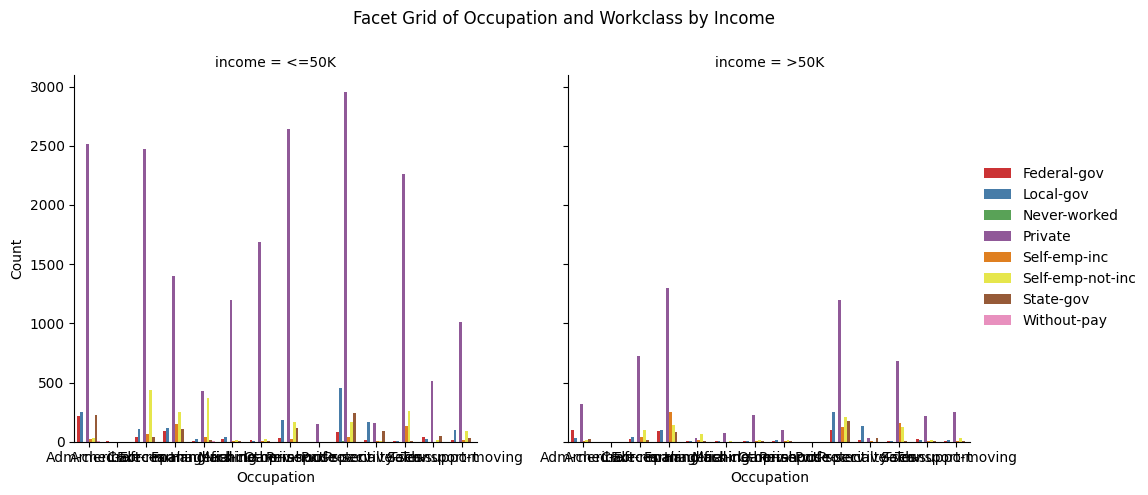

In [235]:
g = sns.FacetGrid(data, col='income', col_wrap=2, height=5)
g.map_dataframe(sns.countplot, x='occupation', hue='workclass', palette='Set1')
g.set_axis_labels('Occupation', 'Count')
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Facet Grid of Occupation and Workclass by Income')
plt.show()